In [1]:
import matplotlib.pyplot as plt
import numpy as np
import OOPAO




     °          *      *      
 ▄██▄   ▄██▄  ▄███▄   ▄██▄ * ▄██▄ 
██* ██ ██  ██ ██  ██ ██  ██ ██  ██
██  ██ ██° ██ ██  ██ ██* ██ ██  ██
██  ██ ██  ██ ████▀  ██▄▄██ ██  ██
██* ██ ██  ██ ██     ██▀▀██ ██  ██
██  ██ ██  ██ ██ *   ██  ██ ██* ██
 ▀██▀   ▀██▀  ██   ° ██  ██  ▀██▀ 
      *         *             




In [2]:
import tomoAO
tomoAO.__version__

'0.0.3'

In [3]:
ao_mode = "MLAO"

config_dir = "/home/joaomonteiro/Desktop/OOPAO_ast/tutorials/"
config_file = "config.ini"

# Loading the config
config_vars = tomoAO.IO.load_from_ini(config_file, ao_mode=ao_mode,config_dir=config_dir)

In [4]:
from OOPAO.Source import Source
from OOPAO.Asterism import Asterism

optBand = config_vars["lgs_opticalBand"]
magnitude = config_vars["lgs_magnitude"]
lgs_zenith = config_vars["lgs_zenith"]
lgs_azimuth = config_vars["lgs_azimuth"]

n_lgs = 4

lgsAst = Asterism([Source(optBand=optBand,
              magnitude=magnitude,
              coordinates=[lgs_zenith[kLgs], lgs_azimuth[kLgs]])
          for kLgs in range(n_lgs)])



------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 1.7e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  8.00   
Flux [photon/m²/s]       | 1.8e+06 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 1.7e-06 
Zenith [arcsec]          |  1.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  8.00   
Flux [photon/m²/s]       | 1.8e+06 
Coordinates [arcsec,deg] | [1,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 1.7e-06 
Zenith [arcsec]          |  2.00   
Azimuth [°]              |  90.00  
Altitude [m]             |   inf   
Magnitude                |  8.00   
Flux [photon/m²/s]       | 1.


------------ Telescope -------------
Diameter [m]             |   8.00   
Resolution [px]          |   160    
Pixel size [m]           |   0.05   
Surface [m²]             |   0.05   
Central obstruction [%]  |    10    
Pixels in pupil          |  19900   
Field of view [arcsec]   |   5.00   
------------------------------------



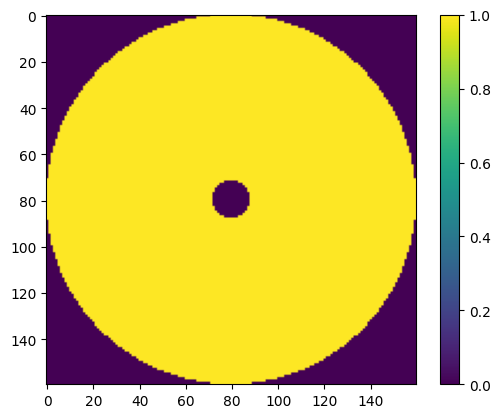

In [5]:
from OOPAO.Telescope import Telescope

sensing_wavelength = lgsAst.src[0].wavelength      # sensing wavelength of the WFS, read from the ngs object
n_subaperture      = 20                  # number of subaperture across the diameter
diameter           = 8                   # diameter of the support of the phase screens in [m]
resolution         = n_subaperture*8     # resolution of the phase screens in pixels
pixel_size         = diameter/resolution # size of the pixels in [m]
obs_ratio          = 0.1                 # central obstruction in fraction of the telescope diameter
sampling_time      = 1/1000              # sampling time of the AO loop in [s]
fieldOfViewInArcsec = 5

# initialize the telescope object
tel = Telescope(diameter          = diameter,
               resolution         = resolution,
               centralObstruction = obs_ratio,
               samplingTime       = sampling_time,
               fov                = fieldOfViewInArcsec)

plt.imshow(tel.pupil)
plt.colorbar()

In [6]:
lgsAst*tel


--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------

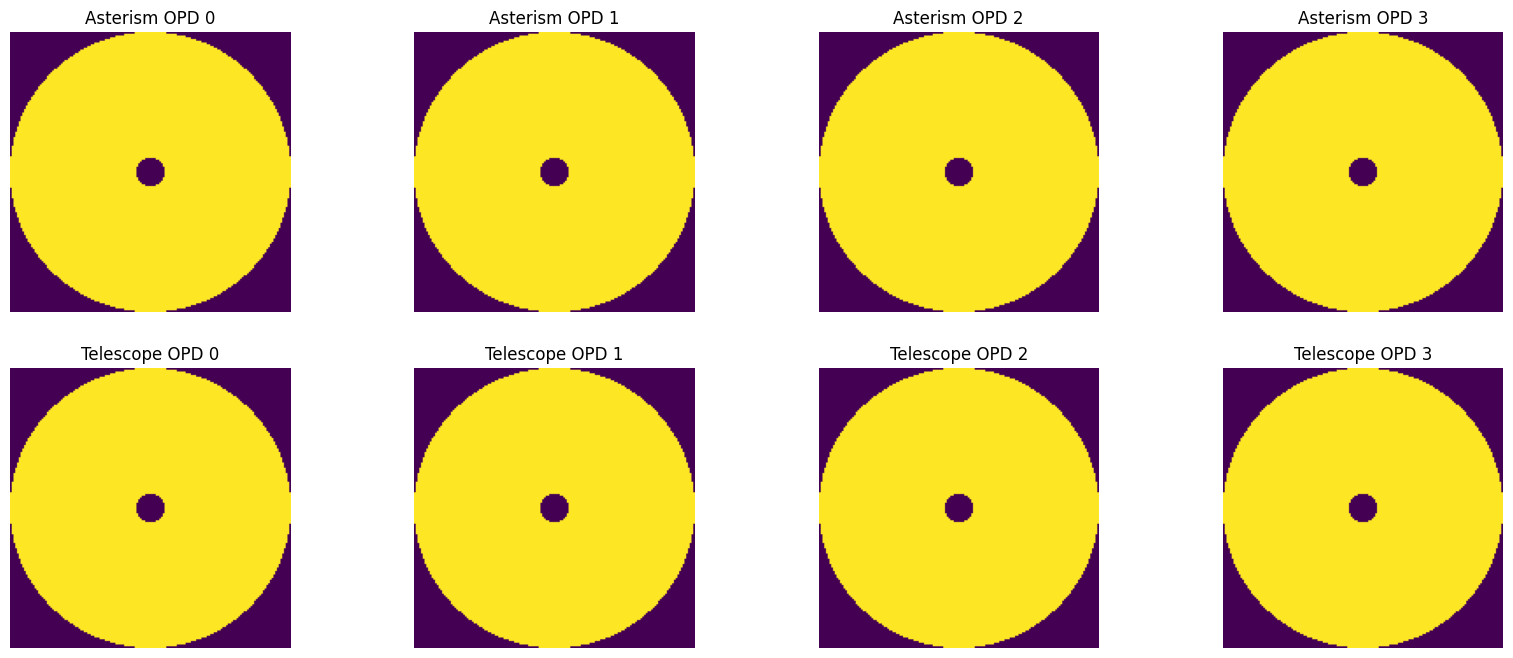

In [7]:
fig, axes = plt.subplots(2, n_lgs, figsize=(20, 8))

if n_lgs == 1:
    axes = axes.reshape(2, 1)

for i in range(n_lgs):
    axes[0, i].imshow(lgsAst.OPD[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Asterism OPD {i}')


for i in range(n_lgs):
    axes[1, i].imshow(tel.OPD[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Telescope OPD {i}')

In [8]:
# tel.pupilReflectivity = tel.pupil.astype(float)
# zeroPaddingFactor = 6
# tel.computePSF(zeroPaddingFactor=zeroPaddingFactor)
#
# fig, axes = plt.subplots(1, 5, figsize=(20, 4))
#
# im = axes[0].imshow(np.log10(tel.PSF+1e-100), extent = [tel.xPSF_arcsec[0],tel.xPSF_arcsec[1],tel.xPSF_arcsec[0],tel.xPSF_arcsec[1]])# adding 1e-100 for display purpose
# im.set_clim([np.log10(tel.PSF).max()-4,np.log10(tel.PSF).max()])
# axes[0].set_xlabel('[Arcsec]')
# axes[0].set_ylabel('[Arcsec]')
# # axes[0].grid()
#
# size_pixel_arcsec = 206265*(tel.src.wavelength/tel.D)/zeroPaddingFactor
# N                 = 300
#
# for i in range(lgsAst.n_source):
#     normalized_PSF = tel.PSF_list[i][N:-N,N:-N]# crop to zoom on the center
#     fov = normalized_PSF.shape[0]*size_pixel_arcsec
#
#     im = axes[i+1].imshow(np.log10(normalized_PSF),extent=[-fov/2,fov/2,-fov/2,fov/2])
#     im.set_clim([-6,4])
#     axes[i+1].axis('off')
#     axes[i+1].set_xlabel('[Arcsec]')
#     axes[i+1].set_ylabel('[Arcsec]')
#     axes[i+1].set_title('NGS @ '+str(np.round(lgsAst.src[i].coordinates[0],1)) +';'+str(np.round(lgsAst.src[i].coordinates[1],1)))
#
# plt.show()

Creation of layer1/2 ...
-> Computing the initial phase screen...
initial phase screen : 0.016303062438964844 s
ZZt.. : 2.761640787124634 s
ZXt.. : 0.42116832733154297 s
XXt.. : 0.2010033130645752 s
Done!
Creation of layer2/2 ...
-> Computing the initial phase screen...
initial phase screen : 0.024118900299072266 s
ZZt.. : 4.153268098831177 s
ZXt.. : 0.46866321563720703 s
XXt.. : 0.20955801010131836 s
Done!
Updating the Atmosphere covariance matrices...

------------------------ Atmosphere -------------------------
 Layer | Direction | Speed | Altitude | Frac Cn² | Diameter |
       |    [°]    | [m/s] |   [m]    |   [%]    |   [m]    |
   1   |     0     |  5.0  |  0e+00   |    70    |  8.200   |
   2   |    45     | 20.0  |  1e+04   |    30    |  8.450   |
r0 @ 500 nm [m] |   0.16   
L0 [m]          |   50.0   
Tau0 [s]        |  0.0052  
V0 [m/s]        |   9.50   
Frequency [Hz]  |  1000.0  
-------------------------------------------------------------

Telescope and Atmosphere com

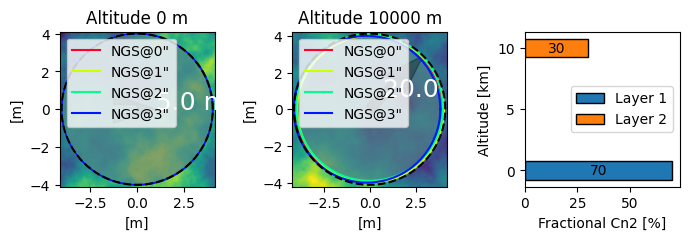

In [9]:
from OOPAO.Atmosphere import Atmosphere


# TODO: read from config file
r0 = config_vars["r0"]
L0 = config_vars["L0"]

fractionnalR0 = config_vars["fractionnalR0"]
windSpeed = config_vars["windSpeed"]
windDirection = config_vars["windDirection"]
altitude = config_vars["altitude"]



atm = Atmosphere(telescope      = tel,
                 r0             = r0,
                 L0             = L0,
                 fractionalR0   = fractionnalR0,
                 altitude       = altitude,
                 windDirection  = windDirection,
                 windSpeed      = windSpeed)


atm.initializeAtmosphere(telescope=tel)
tel+atm
atm.display_atm_layers()


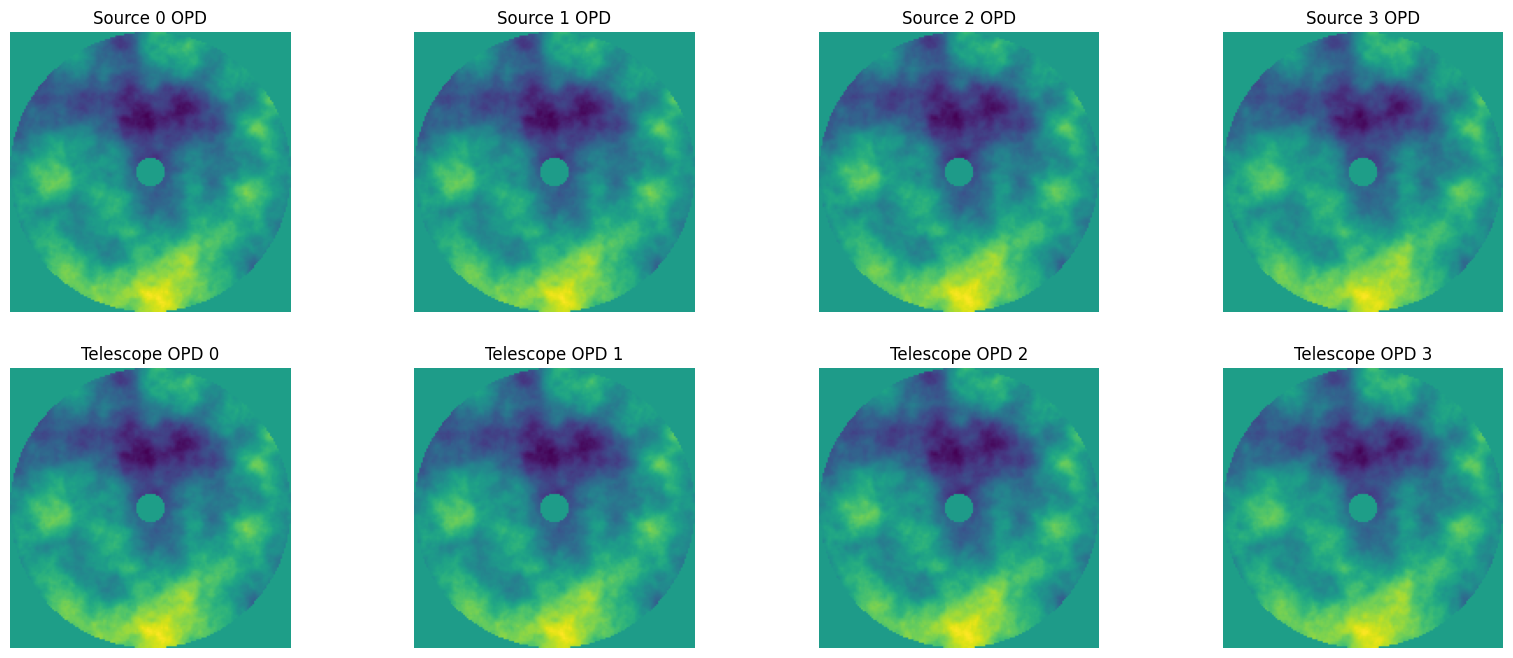

In [10]:
fig, axes = plt.subplots(2, n_lgs, figsize=(20, 8))

if n_lgs == 1:
    axes = axes.reshape(2, 1)

for i in range(n_lgs):
    axes[0, i].imshow(lgsAst.OPD[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Source {i} OPD')


for i in range(n_lgs):
    axes[1, i].imshow(tel.OPD[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Telescope OPD {i}')

In [11]:
# %%
print(f"lgsAst:")
lgsAst.print_optical_path()

print(f"\ntel:")
tel.print_optical_path()

lgsAst:
NGS(H) ~~> atmosphere ~~> telescope
NGS(H) ~~> atmosphere ~~> telescope
NGS(H) ~~> atmosphere ~~> telescope
NGS(H) ~~> atmosphere ~~> telescope

tel:
No light propagated through the telescope


In [12]:
lgsAst**tel

True
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------

False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   


--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------

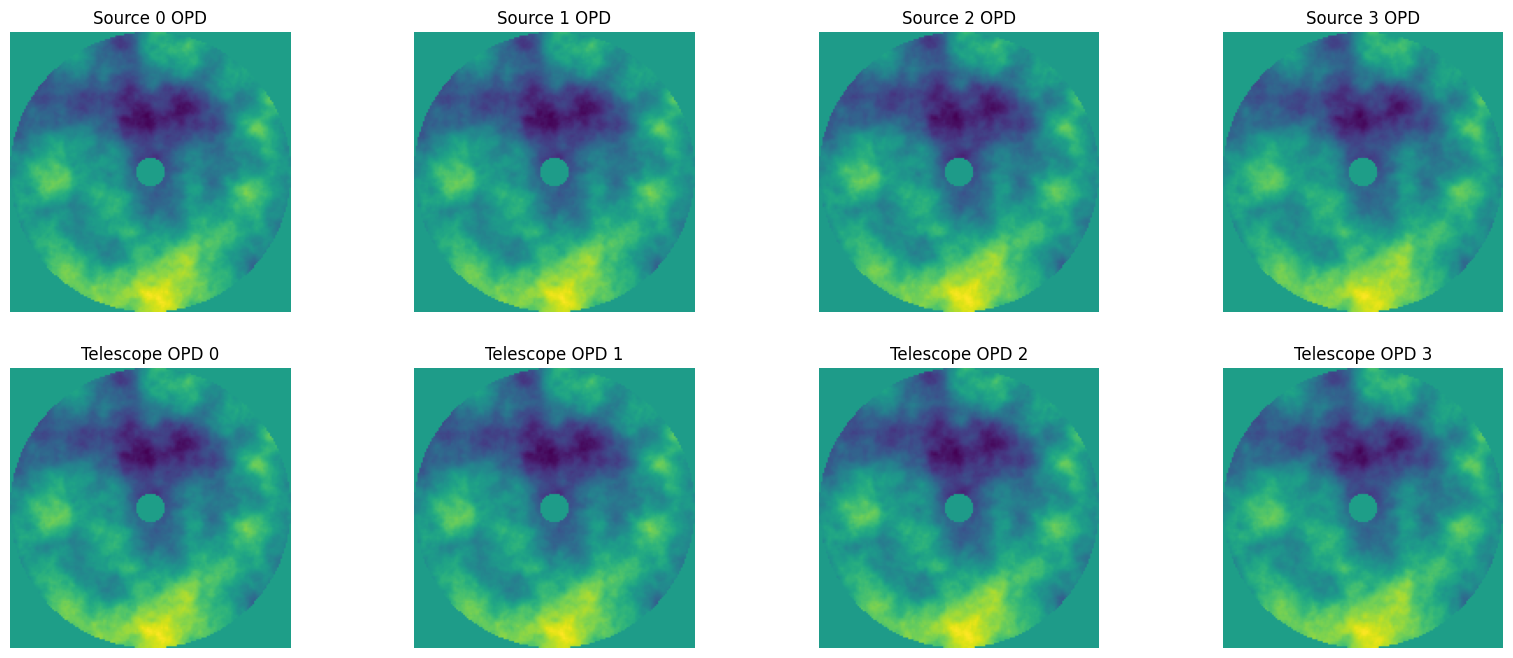

In [13]:
fig, axes = plt.subplots(2, n_lgs, figsize=(20, 8))

if n_lgs == 1:
    axes = axes.reshape(2, 1)

for i in range(n_lgs):
    axes[0, i].imshow(lgsAst.OPD[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Source {i} OPD')


for i in range(n_lgs):
    axes[1, i].imshow(tel.OPD[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Telescope OPD {i}')

In [14]:
print(f"lgsAst:")
lgsAst.print_optical_path()

print(f"\ntel:")
tel.print_optical_path()

lgsAst:
NGS(H) ~~> atmosphere ~~> telescope
NGS(H) ~~> atmosphere ~~> telescope
NGS(H) ~~> atmosphere ~~> telescope
NGS(H) ~~> atmosphere ~~> telescope

tel:
No light propagated through the telescope


In [47]:
from OOPAO.DeformableMirror import DeformableMirror
mechanical_coupling = 0.1458


dm_fried = DeformableMirror(telescope    = tel,
                            nSubap       = n_subaperture, # by default n_subaperture+1 actuators are considered (Fried Geometry)
                            mechCoupling = mechanical_coupling)

# dm_fried.coefs = np.random.rand(dm_fried.nValidAct)
dm_fried.coefs = 0


lgsAst**tel*dm_fried



No coordinates loaded.. taking the cartesian geometry as a default
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   356   
M4                       |  False  
Pitch [m]                |  0.40   
Mechnical coupling [%]   |   15    
== Misregistration ================
Rotation [°]             |  0.000  
Shift X [m]              |0.000e+00
Shift Y [m]              |0.000e+00
Anamorphosis angle [°]   |  0.000  
Tangential scaling [%]   |  0.000  
Radial scaling [%]       |  0.000  
-----------------------------------

False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06 


--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

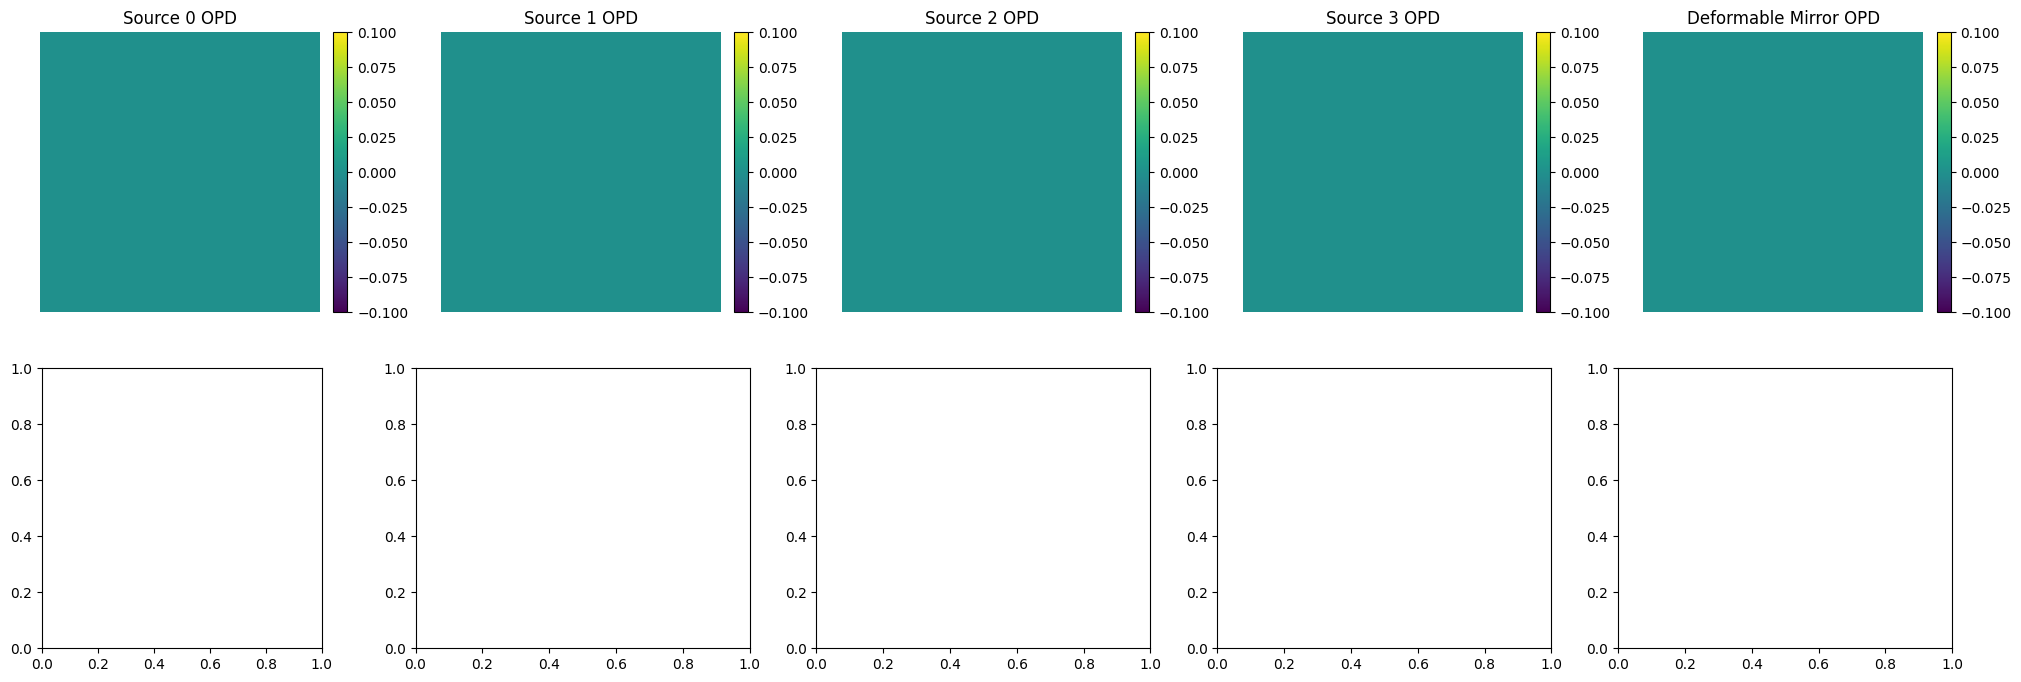

In [49]:
fig, axes = plt.subplots(2, n_lgs+1, figsize=((n_lgs+1)*5, 8))


for i in range(n_lgs):
    im = axes[0, i].imshow(lgsAst.OPD_no_pupil[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Source {i} OPD')
    fig.colorbar(im, ax=axes[0, i], fraction=0.046, pad=0.04)

im = axes[0, n_lgs].imshow(dm_fried.OPD)
axes[0, n_lgs].axis('off')
axes[0, n_lgs].set_title(f'Deformable Mirror OPD')
fig.colorbar(im, ax=axes[0, n_lgs], fraction=0.046, pad=0.04)


for i in range(n_lgs):
    im = axes[1, i].imshow(tel.OPD[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Telescope OPD {i}')
    fig.colorbar(im, ax=axes[1, i], fraction=0.046, pad=0.04)

im = axes[1, n_lgs].imshow(dm_fried.OPD*tel.pupil)
axes[1, n_lgs].axis('off')
axes[1, n_lgs].set_title(f'Deformable Mirror OPD')
fig.colorbar(im, ax=axes[1, n_lgs], fraction=0.046, pad=0.04)


No user-input pixel scale - using shannon_sampling input value:2 pixel(s) per spot FWHM
-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   160   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------

Selecting valid subapertures based on flux considerations..
Acquiring reference slopes..
updating the flux of the SHWFS object
Done!
Recalibrating the slopes units
Acquiring reference slopes..
Done!
Done
OOPAO Warning: 
All Detector Noises are disables with the geometric WFS

------- Shack-Hartmann WFS --------
Subapertures [lenslets]  |   20    
Subaperture Pitch [m]    |  0.40   
Subaperture FoV [arcsec] |  3.41   
Pixel Scale [arcsec]     |  0.426  
Valid Subapertures       |   624   
Spot Sampling [pix]   

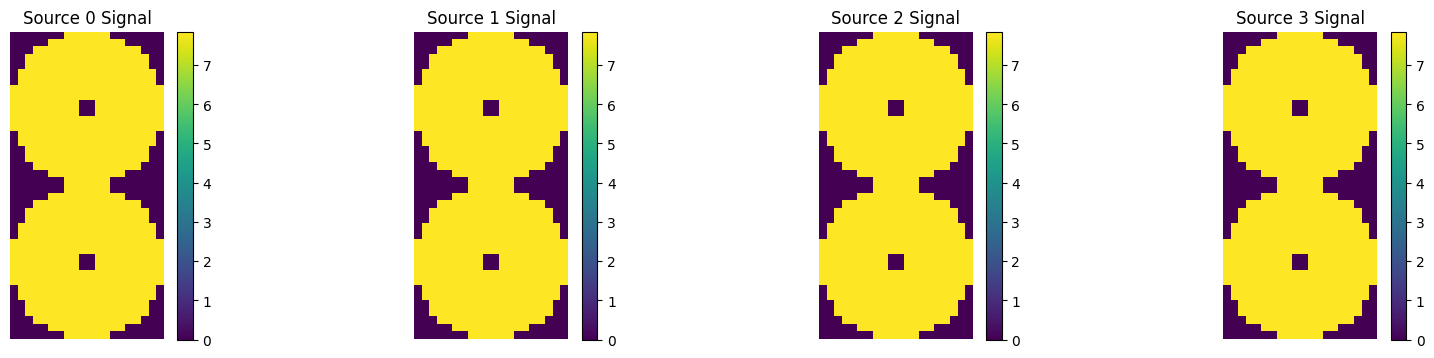

In [51]:
from OOPAO.ShackHartmann import ShackHartmann

shwfs = ShackHartmann(telescope          = tel,
                      src                = lgsAst,
                      nSubap             = n_subaperture,
                      lightRatio         = 0.5,
                      is_geometric       = True,
                      shannon_sampling   = True,
                      threshold_cog      = 0.1)




fig, axes = plt.subplots(1, n_lgs, figsize=(20, 4))

if n_lgs == 1:
    # axes = axes.reshape(2, 1)
    axes = np.atleast_1d(axes)

for i in range(n_lgs):
    im = axes[i].imshow(shwfs.signal_2D[i])
    axes[i].axis('off')
    axes[i].set_title(f'Source {i} Signal')
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)




In [52]:
lgsAst ** tel * dm_fried * shwfs

False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------




--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------

In [53]:
lgsAst.OPD[0].shape

(160, 160)

In [54]:
dm_fried.coefs.shape

(356,)

False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------



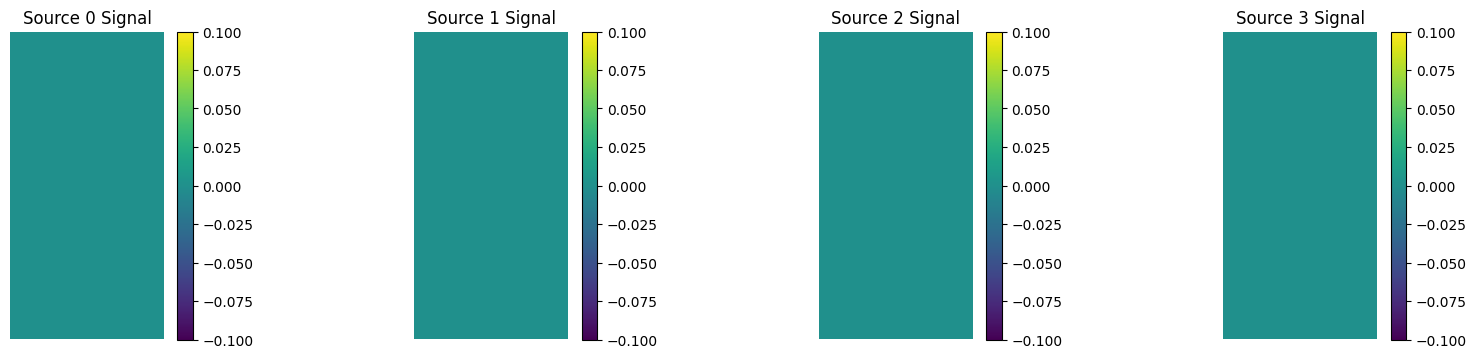

In [55]:
lgsAst ** tel * dm_fried * shwfs

fig, axes = plt.subplots(1, n_lgs, figsize=(20, 4))

if n_lgs == 1:
    # axes = axes.reshape(2, 1)
    axes = np.atleast_1d(axes)

for i in range(n_lgs):
    im = axes[i].imshow(shwfs.signal_2D[i])
    axes[i].axis('off')
    axes[i].set_title(f'Source {i} Signal')
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)


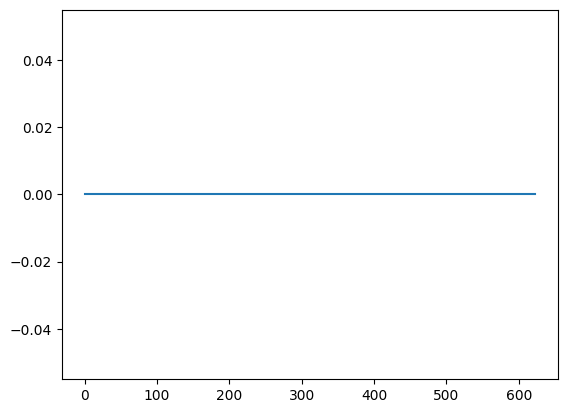

In [56]:
plt.plot(shwfs.signal[0])

In [20]:
aoSys = tomoAO.Simulation.AOSystem(config_vars, tel=tel, lgsAst=lgsAst, atm=atm, dm=dm_fried, wfs=shwfs)


Here----------------

------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 2.2e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 1.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

No coordinates loaded.. taking the cartesian geometry as a default
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   356   
M4                       |  False  
Pitch [m]           

In [21]:
from tomoAO.Reconstruction.reconClassType import tomoReconstructor

rec = tomoReconstructor(aoSys=aoSys, alpha=10, os=2)

Updating the Atmosphere covariance matrices...
GPU not available, using CPU
Building Gamma
Took 0.13089466094970703 seconds to build Gamma
Building the covariance matrices
Took 34.52545881271362 seconds to build the covariance matrices
Building the reconstructor
Took 13.432316064834595 seconds to build the reconstructor


In [63]:
reconstructor = np.array(rec.R_unfiltered)
# reconstructor
reconstructor = reconstructor * lgsAst.src[0].wavelength / 2 / (tel.D/20)
reconstructor = reconstructor*4
reconstructor.shape

(356, 2496)

In [57]:
for i in range(n_lgs):
    signal = np.zeros((624*4))
    # signal_single = np.zeros((624))
    signal[int(624/2)*n_lgs:int(624/2)*(n_lgs+1)] = shwfs.signal[i][int(624/2):]
    signal[int(624/2)*(n_lgs+1):int(624/2)*(n_lgs+2)] = shwfs.signal[i][:int(624/2)]



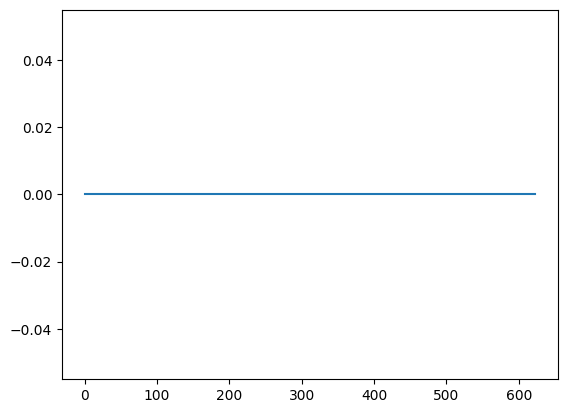

In [38]:
plt.plot(signal[:624])

In [35]:
signal.shape

(2496,)

In [29]:
rec.Reconstructor[0].shape

(1336, 2496)

In [26]:
phi_rec = np.array(rec.Reconstructor[0] @ signal)
phi_rec.shape

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 624 is different from 2496)

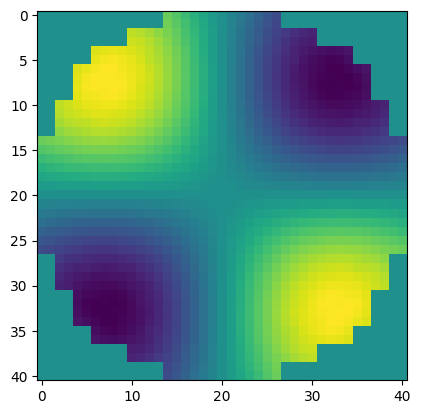

In [76]:
phi_rec_2D = np.zeros((41,41))
phi_rec_2D[rec.outputRecGrid] = phi_rec.flatten()
plt.imshow(phi_rec_2D)


In [27]:
from OOPAO.calibration.compute_KL_modal_basis import compute_KL_basis
M2C_KL = compute_KL_basis(src=lgsAst.src[0],tel=tel,atm=atm,dm=dm_fried)

TIME ELAPSED: 5 sec. COMPLETED: 100 %
NMAX =  355
RMS opd error = [[1.71395560e-08 2.05824385e-08 2.05824385e-08]]
RMS Positions = [[7.00053659e-08 6.66058857e-07 6.66058857e-07]]
MAX Positions = [[7.64935592e-07 1.48894032e-06 1.48894032e-06]]
KL WITH DOUBLE DIAGONALISATION: COVARIANCE ERROR =  5.35196901805188e-15


In [59]:
reconstructor.shape

(356, 2496)

False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------



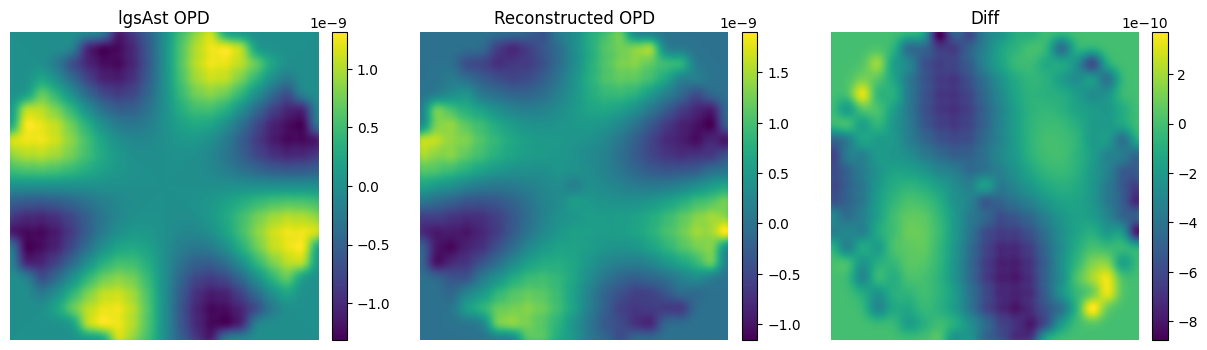

In [68]:
n = 10
input_modes = np.random.randn(1)*1e-9
dm_fried.coefs = M2C_KL[:,n] * input_modes

lgsAst**tel*dm_fried*shwfs
# shwfs.signal = np.hstack(shwfs.signal)



for i in range(n_lgs):
    signal = np.zeros((624*4))
    # signal_single = np.zeros((624))
    signal[int(624/2)*n_lgs:int(624/2)*(n_lgs+1)] = shwfs.signal[i][int(624/2):]
    signal[int(624/2)*(n_lgs+1):int(624/2)*(n_lgs+2)] = shwfs.signal[i][:int(624/2)]
shwfs.signal = signal

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

im = axes[0].imshow(lgsAst.OPD_no_pupil[0])
axes[0].axis('off')
axes[0].set_title(f'lgsAst OPD')
fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

rec_OPD = (dm_fried.modes@reconstructor@shwfs.signal).reshape((tel.resolution, tel.resolution))

# rec_OPD = (reconstructor@shwfs.signal)

im = axes[1].imshow(rec_OPD)
axes[1].axis('off')
axes[1].set_title(f'Reconstructed OPD')
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

im = axes[2].imshow(dm_fried.OPD-rec_OPD)
axes[2].axis('off')
axes[2].set_title(f'Diff')
fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)



In [83]:
# Define a scientific source:
SciSrc = Source('K',10)

tel.resetOPD()  # initialize Telescope
lgsAst.resetOPD()
dm = dm_fried
dm.coefs=0      # initialize DM commands
tel.print_optical_path()


tel+atm # combine tel and atm to enable turbulence

tel.computePSF(4)



# initialize DM commands
lgsAst**tel*dm*shwfs

nLoop = 10

# allocate memory to save data
SR                      = np.zeros(nLoop)
total                   = np.zeros(nLoop)
residual                = np.zeros(nLoop)
wfsSignal               = np.arange(0,shwfs.nSignal)*0

# loop parameters
gainCL                  = 0.4
display                 = True


reconstructor = np.array(rec.R_unfiltered)
reconstructor = reconstructor * lgsAst.src[0].wavelength / 2 / (tel.D/20)
reconstructor = reconstructor*4


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 2.2e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  10.00  
Flux [photon/m²/s]       | 1.9e+05 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------

No light

In [84]:
SciSrc*tel*dm*shwfs


AttributeError: 'list' object has no attribute 'shape'

In [90]:
type(atm.OPD)

list

In [80]:

for i in range(nLoop):
    # update phase screens => overwrite tel.OPD and consequently tel.src.phase
    atm.update()

    # save phase variance
    total[i]=np.std(SciSrc.OPD[np.where(tel.pupil>0)])*1e9
    # save turbulent phase
    # turbPhase = ngs.phase
    # propagate to the WFS with the CL commands applied
    lgsAst**tel*dm*shwfs

    # propagate to the source with the CL commands applied
    SciSrc**tel*dm*shwfs

    dm.coefs=dm.coefs-gainCL*np.matmul(reconstructor,wfsSignal)
    # store the slopes after computing the commands => 2 frames delay

    for i in range(n_lgs):
        signal = np.zeros((624*4))
        # signal_single = np.zeros((624))
        signal[int(624/2)*n_lgs:int(624/2)*(n_lgs+1)] = shwfs.signal[i][int(624/2):]
        signal[int(624/2)*(n_lgs+1):int(624/2)*(n_lgs+2)] = shwfs.signal[i][:int(624/2)]

    wfsSignal=signal
    # store data

    SR[i]=np.exp(-np.var(SciSrc.phase[np.where(tel.pupil==1)]))
    residual[i]=np.std(SciSrc.OPD[np.where(tel.pupil>0)])*1e9
    print('Loop'+str(i)+'/'+str(nLoop)+' AO residual: '+str(residual[i])+' nm')


# plot when done
plt.figure()
plt.plot(total)
plt.plot(residual)

updating the flux of the SHWFS object
False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------

updating the flux of the SHWFS object
updating the flux of the SHWFS object


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 624 is different from 2496)

False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------



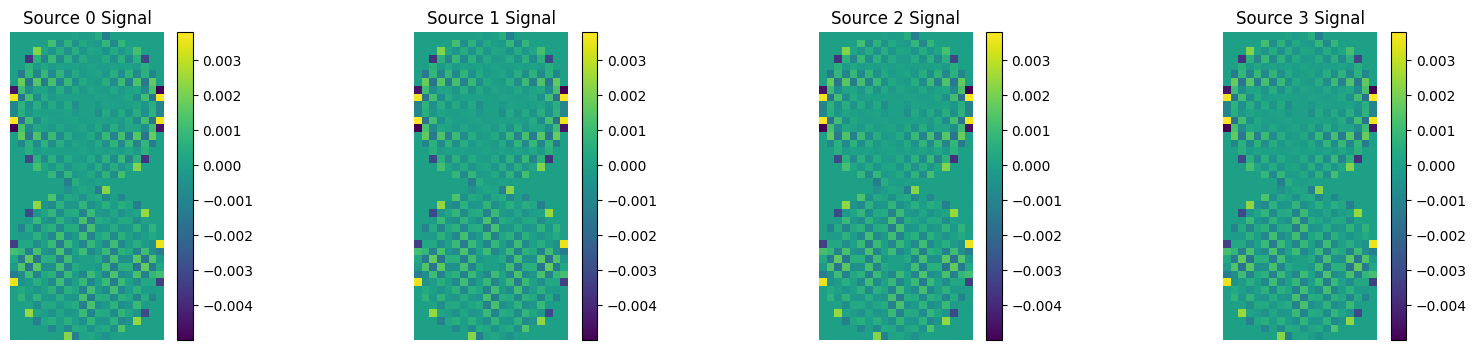

In [67]:
lgsAst ** tel * dm_fried * shwfs

fig, axes = plt.subplots(1, n_lgs, figsize=(20, 4))

if n_lgs == 1:
    # axes = axes.reshape(2, 1)
    axes = np.atleast_1d(axes)

for i in range(n_lgs):
    im = axes[i].imshow(shwfs.signal_2D[i])
    axes[i].axis('off')
    axes[i].set_title(f'Source {i} Signal')
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)


False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------



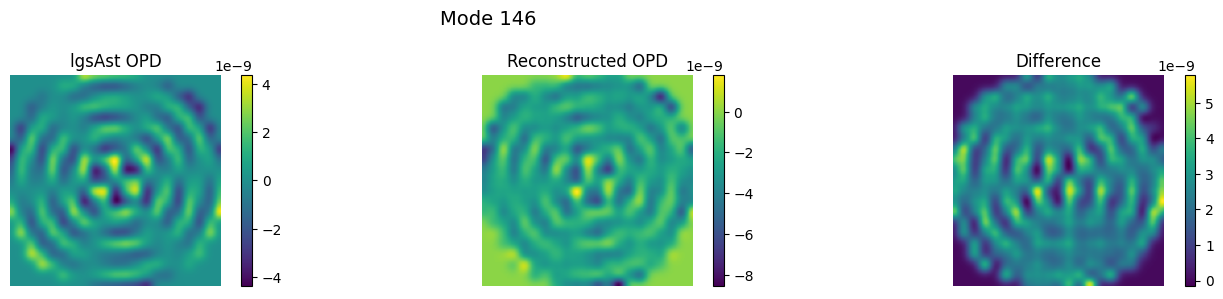

False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------



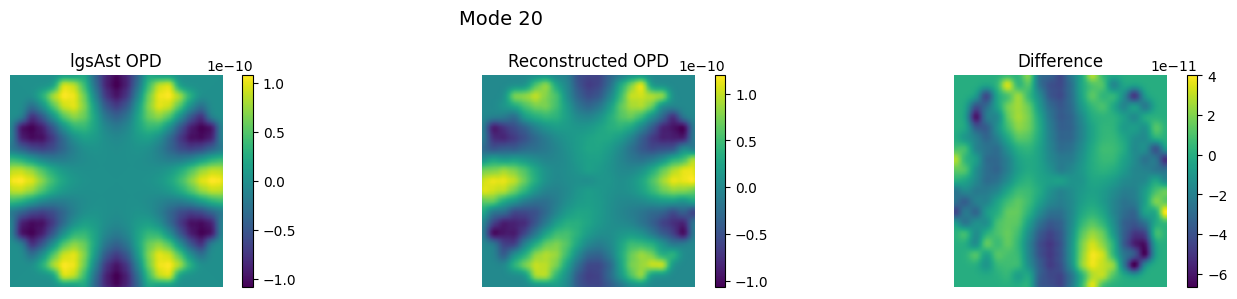

False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------



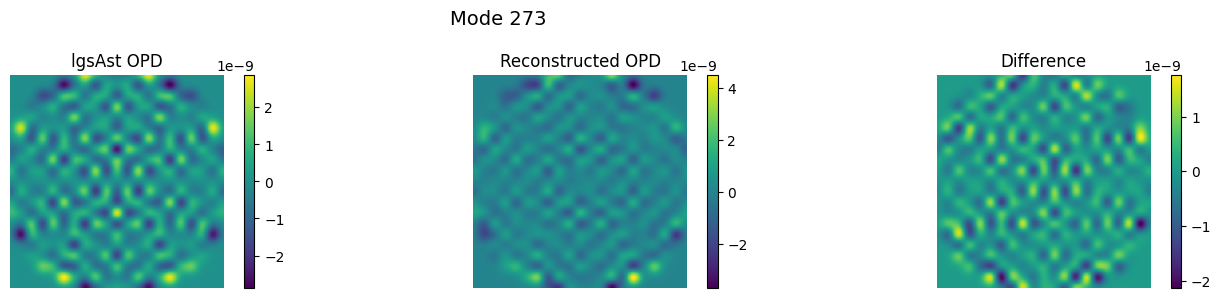

False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------



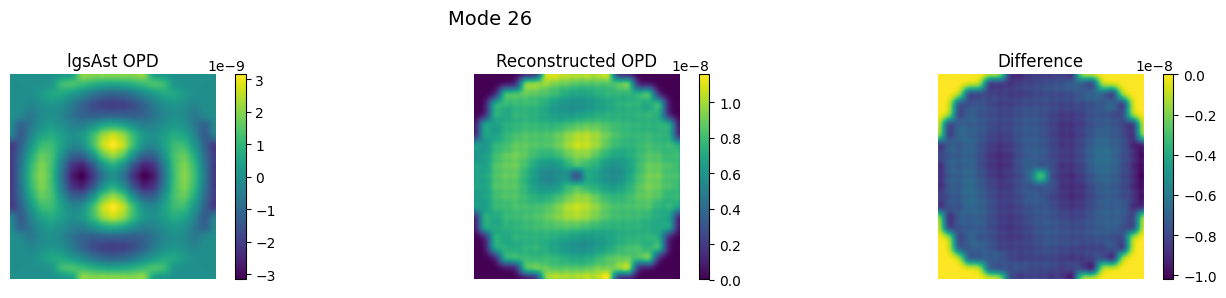

False
asterism

--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  1.7e-06   |  0.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  2-NGS |  1.7e-06   |  1.00  |  0.00   |   inf    |   8.00    |  1.8e+06  |
  3-NGS |  1.7e-06   |  2.00  |  90.00  |   inf    |   8.00    |  1.8e+06  |
  4-NGS |  1.7e-06   |  3.00  | 180.00  |   inf    |   8.00    |  1.8e+06  |
----------------------------------------------------------------------------



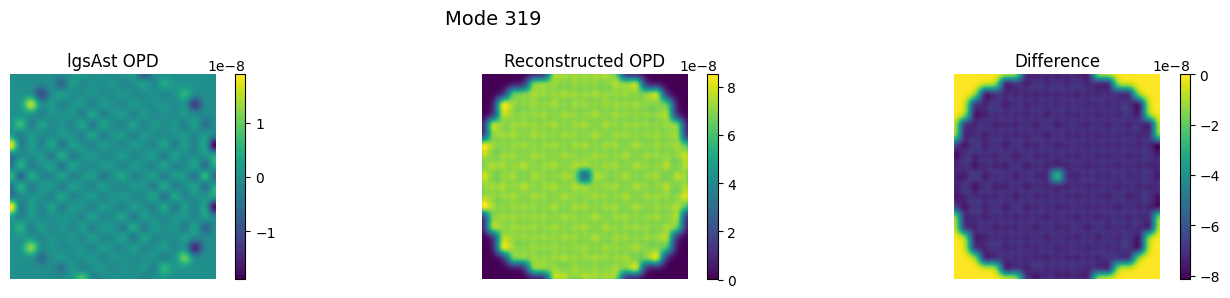

In [65]:
n_iter = 5
for i in range(n_iter):
    n = np.random.randint(M2C_KL.shape[1])
    input_modes = np.random.randn(1) * 1e-9
    dm_fried.coefs = M2C_KL[:, n] * input_modes

    lgsAst**tel*dm_fried*shwfs

    for i in range(n_lgs):
        signal = np.zeros((624*4))
        # signal_single = np.zeros((624))
        signal[int(624/2)*n_lgs:int(624/2)*(n_lgs+1)] = shwfs.signal[i][int(624/2):]
        signal[int(624/2)*(n_lgs+1):int(624/2)*(n_lgs+2)] = shwfs.signal[i][:int(624/2)]
    shwfs.signal = signal


    fig, axes = plt.subplots(1, 3, figsize=(15, 3))
    fig.suptitle(f'Mode {n}', fontsize=14)

    im = axes[0].imshow(lgsAst.OPD_no_pupil[0])
    axes[0].axis('off')
    axes[0].set_title('lgsAst OPD')
    fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

    rec_OPD = (dm_fried.modes @ reconstructor @ shwfs.signal).reshape((tel.resolution, tel.resolution))

    im = axes[1].imshow(rec_OPD)
    axes[1].axis('off')
    axes[1].set_title('Reconstructed OPD')
    fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

    im = axes[2].imshow(dm_fried.OPD - rec_OPD)
    axes[2].axis('off')
    axes[2].set_title('Difference')
    fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

In [25]:
np.min((dm_fried.OPD)), np.max(dm_fried.OPD)

(np.float64(-3.3061834325444983e-10), np.float64(3.306183432544175e-10))

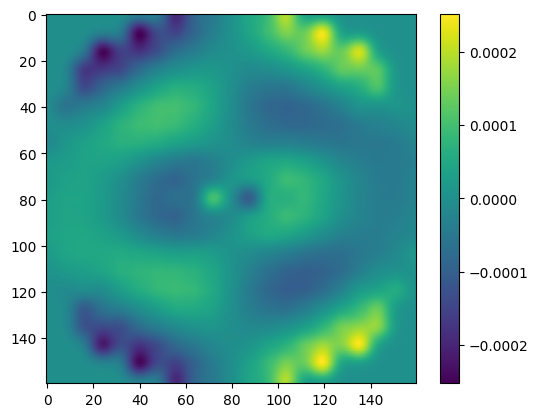

In [26]:
im = dm_fried.modes@reconstructor@shwfs.signal
plt.imshow(im.reshape((tel.resolution, tel.resolution)).T)
plt.colorbar()

In [27]:
dm_fried.modes.shape

(25600, 356)

In [28]:
reconstructor.shape

(356, 624)

In [29]:
shwfs.signal = np.hstack(shwfs.signal)

In [30]:
dm_fried.modes@reconstructor@shwfs.signal

array([-4.60973133e-15, -1.45879414e-14, -4.60343217e-14, ...,
        4.60343217e-14,  1.45879414e-14,  4.60973133e-15], shape=(25600,))

In [31]:
lgsAst.resetOPD()  # initialize Telescope
dm = aoSys.dm
dm_fried.coefs=0      # initialize DM commands
tel.print_optical_path()




No light propagated through the telescope


No user-input pixel scale - using shannon_sampling input value:2 pixel(s) per spot FWHM
-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   160   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------

Selecting valid subapertures based on flux considerations..
Acquiring reference slopes..
updating the flux of the SHWFS object
Done!
Recalibrating the slopes units
Acquiring reference slopes..
Done!
Done

------- Shack-Hartmann WFS --------
Subapertures [lenslets]  |   20    
Subaperture Pitch [m]    |  0.40   
Subaperture FoV [arcsec] |  3.41   
Pixel Scale [arcsec]     |  0.426  
Valid Subapertures       |   624   
Spot Sampling [pix]      |  2.00   
Geometric WFS            |  False  
----------------------

IndexError: list index out of range

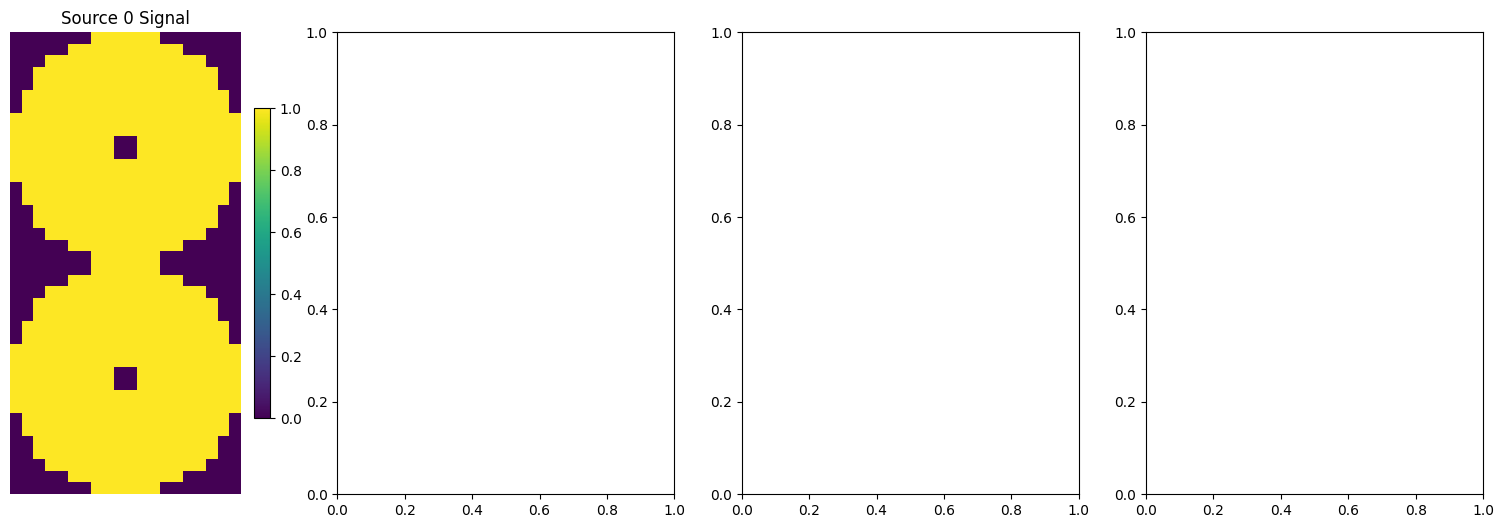

In [32]:
from OOPAO.ShackHartmann import ShackHartmann

shwfs = ShackHartmann(telescope        = tel,
                      src              = lgsAst,
                      nSubap           = n_subaperture,
                      lightRatio       = 0.5,
                      is_geometric     = False,
                      shannon_sampling = True,
                      threshold_cog    = 0.1)

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    im = axes[i].imshow(shwfs.signal_2D[i])
    axes[i].axis('off')
    axes[i].set_title(f'Source {i} Signal')
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

Telescope and Atmosphere separated!
Telescope and Atmosphere combined!
OOPAO Warning: 
The light in the subaperture is probably wrapping!
23.3 % of the total flux detected on the edges of the subapertures.
You may want to lower the seeing value or increase the number of pixel per subaperture
OOPAO Warning: 
The light in the subaperture is probably wrapping!
23.3 % of the total flux detected on the edges of the subapertures.
You may want to lower the seeing value or increase the number of pixel per subaperture
OOPAO Warning: 
The light in the subaperture is probably wrapping!
23.3 % of the total flux detected on the edges of the subapertures.
You may want to lower the seeing value or increase the number of pixel per subaperture
OOPAO Warning: 
The light in the subaperture is probably wrapping!
23.3 % of the total flux detected on the edges of the subapertures.
You may want to lower the seeing value or increase the number of pixel per subaperture


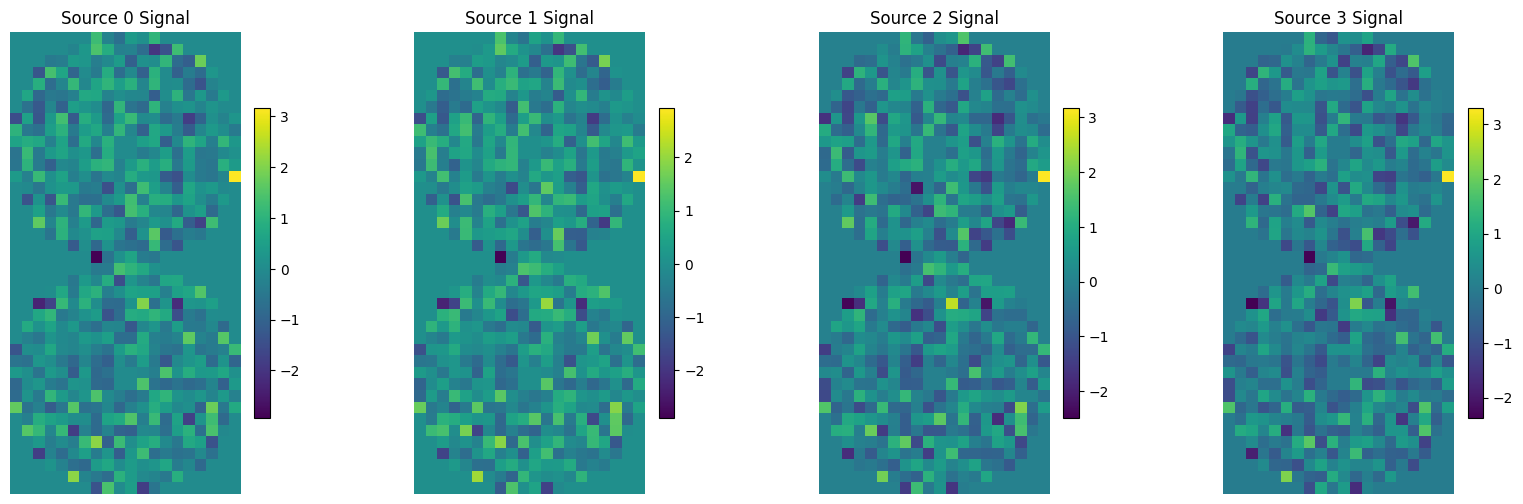

In [33]:
lgsAst ** tel * dm_fried * shwfs

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    im = axes[i].imshow(shwfs.signal_2D[i])
    axes[i].axis('off')
    axes[i].set_title(f'Source {i} Signal')
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

In [34]:
lgsAst.print_optical_path()

NGS(H) ~~> atmosphere ~~> telescope ~~> deformableMirror ~~> shackHartmann
NGS(H) ~~> atmosphere ~~> telescope ~~> deformableMirror ~~> shackHartmann
NGS(H) ~~> atmosphere ~~> telescope ~~> deformableMirror ~~> shackHartmann
NGS(H) ~~> atmosphere ~~> telescope ~~> deformableMirror ~~> shackHartmann
